## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#iMPORTING THE DATASET 
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
rows, col = df.shape
#Obtain data column and row count
print('There are {} observation and {} no. of columns. in the dataset'.format(rows-1, col))

There are 294477 observation and 5 no. of columns. in the dataset


In [4]:
#Get basic statistical summary of data
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [6]:
# no. of unique values
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [7]:
# check for duplicates in the data
sum(df.duplicated())

0

d. The proportion of users converted.

In [8]:
#TAKING IN THE MEAN OF COLUMN CONVERTED
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
#counts where treatment not equal to new_page
df.query ('group == "treatment" and landing_page != "new_page"').count()[0]

1965

In [10]:
#counts where control not equal to old_page
df.query ('group == "control" and landing_page != "old_page"').count()[0]

1928

f. Do any of the rows have missing values?

In [11]:
## Check for any missing values in the data
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
#creating a data set where treatment = new_page and control = old_page
dfA = df.query('group == "treatment" and landing_page == "new_page"')
dfB = df.query('group == "control" and landing_page == "old_page"')

In [13]:
dfA.head(5)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [14]:
dfB.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [15]:
#creating merged dataset of dfa and dfb
df2 = dfA.merge(dfB, how='outer')

In [16]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [18]:
rows, col = df2.shape
#Obtain data column and row count
print('There are {} observation and {} no. of columns. in the dataset'.format(rows-1, col))

There are 290584 observation and 5 no. of columns. in the dataset


In [19]:
df2.shape

(290585, 5)

In [20]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [21]:
# no. of unique values
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [22]:
#First check the duplicate presence 
sum(df2.user_id.duplicated())

1

In [23]:
#finding all the duplicate rows for column user_id
user = df2["user_id"]
df2[user.isin(user[user.duplicated()])]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


  #### Notice the user_id is duplicate but the timestamp is unique

c. What is the row information for the repeat **user_id**? 

In [24]:
# Select duplicate rows based on user_id column
dup =user[user.duplicated()]
print("Duplicate user_id is:", dup, sep='\n')

Duplicate user_id is:
1404    773192
Name: user_id, dtype: int64


In [25]:
#Another way
dup2 = df2[df2.duplicated(['user_id'])]

print("Duplicate Rows based on a user_id column are:", dup2, sep='\n')

Duplicate Rows based on a user_id column are:
      user_id                   timestamp      group landing_page  converted
1404   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [26]:
df2 = df2[~df2.user_id.duplicated(keep='first')]
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

In [27]:
#checking the removal of dup
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


In [28]:
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [29]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [30]:
#creating a subset data for column group = control
df_control = df2.query('group == "control"')
df_control.converted.mean()

0.1203863045004612

In [31]:
L1 = len(df_control.index)/len(df2.index)

print("The probability that an individual has a control group or receives old_page is:", L1, sep='\n')

The probability that an individual has a control group or receives old_page is:
0.4999380557773312


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [32]:
#creating a subset data for column group = treatment
df_treat = df2.query('group == "treatment"')
df_treat.converted.mean()

0.11880806551510564

In [33]:
df2

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0


d. What is the probability that an individual received the new page?

In [34]:
#creating a subset data for landing page = new_page
df_newpage = df2.query('landing_page == "new_page"')

In [35]:
l2 = len(df_newpage.index)/len(df2.index)

print("The probability that an individual received the new page is:", l2, sep='\n')

The probability that an individual received the new page is:
0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

The probability that an individual received the new page is 0.50006, **just about 50%**. This could be purely by chance. Hence we cannot conclude there is sufficient evidence new_page could lead to more conversions. 

As shown above the probability of contol group or probbaility of individual receiving old_page is about 49.9%. This too is just about 50%.

Thus **we cannot conlcude there is sufficient evidence for either old_page or new_page leads to more conversions**.

We need to analyse the data more closely to find the controlling factors.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**Null Hypothesis $H_{0}$**, for present study: The probability that the old page is better than the new page is greater or equal to probability of new page.

**Alternative Hypothesis $H_{1}$**, for present study: The probability that the old_page is less than that of a new page.

$H_{0} : P_{old} - P_{new} \geq 0$

$H_{1}$ :  $P_{old}$ - $P_{new}$ &lt; $0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [36]:
Pnew = df2.converted.mean()
Pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [37]:
Pold = df2.converted.mean() # the same!!!
Pold

0.11959708724499628

c. What is $n_{new}$?

In [38]:
# Nnew will be the users with new page
Nnew_df = df2[df2.landing_page == 'new_page']

len(Nnew_df.index)


145310

In [39]:
# Another way
Nnew=df2.query('landing_page=="new_page"').count()[0]
Nnew

145310

d. What is $n_{old}$?

In [40]:
# Nnew will be the users with old page
#NOld_df = df2[df2.group == 'control']

NOld_df = df2[df2.landing_page == 'old_page']
len(NOld_df.index)

145274

In [41]:
# Another way
Nold=df2.query('landing_page=="old_page"').count()[0]
Nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [42]:
new_page_converted = np.random.binomial(1,Pnew,Nnew) 
new_page_converted.mean()


0.11977840478975982

Notice the mean changes slightly everytime the code is run; but its close to Pnew, its due to the random nature of the array

In [43]:
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

Notice the array of 0 and 1 

In [44]:
len(new_page_converted)

145310

Notice the size of array; its same as Nnew

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [45]:
#Drawing samples from a binomial distribution of probability p_old
old_page_converted= np.random.binomial(1, Pold,Nold)
old_page_converted.mean()

0.11872737034844501

In [46]:
old_page_converted

array([0, 1, 0, ..., 0, 0, 0])

In [47]:
len(old_page_converted)

145274

Notice the mean changes slightly everytime the code is run; but its close to Pold

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [48]:
Diff = new_page_converted.mean() - old_page_converted.mean()
Diff

0.0010510344413148104

In [49]:
# probabilty of new and old page based upon simulated values in e. and f.
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new - p_old

0.0010510344413148104

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [50]:
new_convert=np.random.binomial(Nnew, Pnew, size = 10000)/Nnew

In [51]:
old_convert=np.random.binomial(Nold, Pold, size=10000)/Nold
p_diffs=new_convert-old_convert

In [52]:
p_diffs

array([-7.31738702e-04, -1.18869632e-04,  1.83339512e-04, ...,
        5.96847006e-05, -2.77539045e-04,  8.03119412e-04])

In [53]:
len(p_diffs)

10000

In [54]:
p_diffs.mean()

-8.954403250688186e-06

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

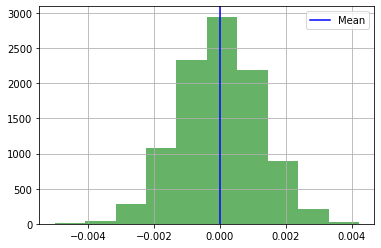

In [55]:
# convert p_diffs to numpy array for array based computations in the future
p_diffs = np.array(p_diffs)

# histogram
plt.hist(p_diffs, color = 'green', alpha = 0.6)
plt.grid()
plt.axvline(p_diffs.mean(), color='b', label='Mean')
plt.legend()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [56]:
#contains treatment/new_page data
dfA
#created in above steps

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [57]:
#contains control/old_page data
dfB

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [58]:
Real_diff = dfA.converted.mean() - dfB.converted.mean()
Real_diff

-0.0015790565976871451

In [59]:
p_diffs.mean()

-8.954403250688186e-06

In [60]:
mean_dif = (Real_diff < p_diffs).mean()

print("The difference between the p_diffs and actual difference observed in ab_data.csv is:", mean_dif, sep='\n')

The difference between the p_diffs and actual difference observed in ab_data.csv is:
0.9025


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.** We computed the **p-value ** above. In the hypothesis testing p value is very important. 
Its the probability value of the null hypothesis is true, the statistical summary (such as the absolute value of the sample mean difference between two compared groups) would be greater than or equal to the actual observed results.

Reference : https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [61]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" and converted==1').count()[0]
convert_new = df2.query('landing_page=="new_page" and converted==1').count()[0]
n_old = df2.query('landing_page=="old_page"').count()[0]
n_new = df2.query('landing_page=="new_page"').count()[0]
print(convert_old)
print(n_old)
print(convert_new)
print(n_new)

17489
145274
17264
145310


In [62]:
#Another way
convert_old = df2.query('landing_page=="old_page" and converted==1').shape[0]
convert_new = df2.query('landing_page=="new_page" and converted==1').shape[0]
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]

print('Number of Rows in convert_old is : ' , convert_old)
print('Number of Rows in convert_new is : ' , convert_new)
print('Number of Rows in n_old is : ' , n_old)
print('Number of Rows in n_new is : ' , n_new)

Number of Rows in convert_old is :  17489
Number of Rows in convert_new is :  17264
Number of Rows in n_old is :  145274
Number of Rows in n_new is :  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [63]:
#Using the reference provided
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old], alternative='larger')
print('The p value is :',p_value)
print('The z score is :',z_score)

The p value is : 0.9050583127590245
The z score is : -1.3109241984234394


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
z-score is a measure of how many standard deviations below or above the population mean a raw score is, or in other words its the probability of a score occurring within our normal distribution. The negative z score suggests its on the left side of the normal curve. The probabilty we calculated in **j is about 0.905**, close to what is otained here. 
The Null hypothesis is difference of Pold and Pnew greater or equal to zero. Here its almost equal to zero.
**Thus its difficult to reject null hypothesis.**

Reference :https://statistics.laerd.com/statistical-guides/standard-score.php

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.** Since we are dealing with the two outcomes here **i.e. conversion verse non-conversion, the Logistic regression will be an appropriate choice** as Logistic regression produces the probability of 0 or 1.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [65]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [66]:
# we create a copy of df2, just to keep things simple
df2_c = df2.copy()

In [67]:
df2_c.shape == df2.shape

True

In [68]:
df2

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [69]:
# add an intercept to dataframe
df2_c['intercept'] = 1
df2_c['ab_page'] = 0
ab_page_index = df2_c[df2_c['group']=='treatment'].index
df2_c.loc[ab_page_index, "ab_page"] = 1

# using pd.get_dummies to convert the 'landing_page' and 'group' to 1s and 0s
#df2_c[['landing_page_new', 'landing_page_old']] = pd.get_dummies(df2_c['landing_page'])
#df2_c[['ab_page_control','ab_page_treatment']] = pd.get_dummies(df2_c['group'])

In [70]:
df2_c
#check ab_page column is 1 when an individual receives the treatment and 0 if control.
#intercept is 1 in all rows

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1
...,...,...,...,...,...,...,...
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [71]:
log = sm.Logit(df2_c['converted'], df2_c[['intercept', 'ab_page']])
model = log.fit() #Fitting the model

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Jan 2020   Pseudo R-squ.:               8.077e-06
Time:                        12:52:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.** The p value for the ab_page is 0.190. Part II we framed the null hypothese where Pold - Pnew >= 0 and alternative hypothesis Pold - Pnew < 0. In simpler words, the $H_{0}$ is where New page converts more or is equal to Old page and $H_{1}$is where  New page converts less than Old page.

Here, for Logistic regression the outcome is binomial.i.e conversion or no conversion.
Thus the for the purpose of hypotheis testing the associated Null and Alternative hypothesis will be :

Null Hypothesis $H_{0} : P_{old} - P_{new} = 0$

Alternative Hypothesis $H_{1}$ : $P_{old}$ - $P_{new} \neq 0$



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.** In any regression the **e OR ERROR** accounts ofr the white noise in the expreiment or the model relationship. If the error is high, it means we are missing a key variable in the relationship equatino. Considering more variables may help to bring down the Error factor. In our study Time of login in may be important as the user may login more often during day hours than night hours.

Adding a variable may bring in the disadvantage of changing the relationship between the existing variables of the model equation.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [73]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [74]:
df_new

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0
...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0


In [75]:
# Create country dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])


In [76]:
df_new.head()

,country,timestamp,group,landing_page,converted,CA,UK,US
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0


In [77]:
df_new['intercept'] = 1
df_new['ab_page'] = 0
ab_page_index = df_new[df_new['group']=='treatment'].index
df_new.loc[ab_page_index, "ab_page"] = 1

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [78]:
df_new.head()

,country,timestamp,group,landing_page,converted,CA,UK,US,intercept,ab_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1


In [79]:
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US','ab_page']])
Log_model = log_mod2.fit()
Log_model.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 16 Jan 2020   Pseudo R-squ.:               2.323e-05
Time:                        12:52:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

#### The p value associated with ab_page is 0.191. There is no significant impact of country variables. Since its not equal to zero, we fail to reject the Null hypotheis framed in Part III

#### Thus there is no significant impact of bringing in the new_page as it doesnt help in improving the conversion rate.





<a id='conclusions'></a>
## Conclusions

Here in this excercise , the impact caused by the introduction of the new_page of the company verses old_page in conversion rate was tested. If the impact was found to be significant, the new_page  will be implemented by the company, else the existing old_page will be continues to be used.

The foloowing testing was peformed
1. **Probability** : The probability of new page is 0.5001. Since its just about 50% its not conclusive to introduce new_page


2. **A/B testing** : We tested whether new_page is better than old_page. The p value was 0.905.Thus again there is not enough evidence to accept Alternative hypothsis or reject Null Hypothsis. As to reject HO the diffrence in the p value of old and new needs to be greater or equal to zero.


3. **Regression method** : Logistic model was built to asses the conversion verses non-conversion binomial outcome.The p value was 0.191 in a two-tailed test. There is not enough evidence to reject Null Hypothesis or Alternative hypothesis cannot be accepted. Also the dummy countries variables created for CA, US and UK have no impact on the conversion rate.


### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.